# Libraries

In [ ]:
# Import all libraries that we will use .
import os
from os import listdir
import pickle
from pickle import dump
from pickle import load
from tqdm.notebook import tqdm
from keras.layers import LSTM, Embedding, BatchNormalization, Dropout, TimeDistributed, Dense, RepeatVector, Activation, Flatten, Bidirectional
import numpy as np
import pandas as pd
from skimage.io import  imread, imshow
import tensorflow as tf
from keras.models import Model
from PIL import Image
import matplotlib.pyplot as plt
from os import listdir
import PIL.Image
from numpy import array
from numpy import argmax
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from keras.utils import to_categorical, plot_model
from keras.models import Model, load_model
from keras.layers import Input, Dense, LSTM, Embedding, Dropout, add
from keras.callbacks import ModelCheckpoint
from nltk.translate.bleu_score import corpus_bleu

In [ ]:
#notice: Disable all warnings 
import warnings
warnings.filterwarnings('ignore')

# Import the Data

 Downloading Kaggle datasets directly into Colab

## Install the kaggle python library

In [ ]:
# install kaggle
! pip install -q kaggle

In [ ]:
# ! pip install kaggle

## Upload kaggle.json file

In [ ]:
from google.colab import files

files.upload()

## create a kaggle folder

In [ ]:
#create a kaggle folder
! mkdir ~/.kaggle/

## copy the kaggle.json to folder create

In [ ]:
#copy the kaggle.json to folder create
! cp kaggle.json ~/.kaggle/

## permission for the json to act

In [ ]:
#permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

## list all datasets in kaggle

In [ ]:
# to list all datasets in kaggle
! kaggle datasets list

ref                                                      title                                     size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  ---------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide     Covid Cases and Deaths WorldWide           8KB  2023-02-01 12:22:51          11779        396  1.0              
naveenkumar20bps1137/walmart-sales-analysis              WALMART SALES ANALYSIS                   119KB  2023-03-03 18:02:11           2107         56  0.9411765        
datascientistanna/customers-dataset                      Shop Customer Data                        23KB  2023-02-07 18:42:21          10127        230  1.0              
ulrikthygepedersen/co2-emissions-by-country              CO2 Emissions                            114KB  2023-02-28 12:39:49            960         30

## Download The Dataset

In [ ]:
# %cd '/content/drive/MyDrive/Final Project AMIT'

/content/drive/MyDrive/Final Project AMIT


In [ ]:
# ! kaggle competitions download -c 'name-of-competition'
!kaggle datasets download -d adityajn105/flickr8k

100% 1.03G/1.04G [00:11<00:00, 142MB/s]
100% 1.04G/1.04G [00:11<00:00, 99.3MB/s]


In [ ]:
from zipfile import ZipFile

# opening the zip file in READ mode
file_name = '/content/drive/MyDrive/Final Project AMIT/flickr8k.zip'
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()

Streaming output truncated to the last 5000 lines.
Images/2844846111_8c1cbfc75d.jpg               2020-04-27 07:28:50       119918
Images/2844963839_ff09cdb81f.jpg               2020-04-27 07:28:50       171413
Images/2845246160_d0d1bbd6f0.jpg               2020-04-27 07:28:50       193348
Images/2845691057_d4ab89d889.jpg               2020-04-27 07:28:50        70736
Images/2845845721_d0bc113ff7.jpg               2020-04-27 07:28:50       111711
Images/2846037553_1a1de50709.jpg               2020-04-27 07:28:50       160979
Images/2846785268_904c5fcf9f.jpg               2020-04-27 07:28:50        76823
Images/2846843520_b0e6211478.jpg               2020-04-27 07:28:50       219425
Images/2847514745_9a35493023.jpg               2020-04-27 07:28:50       137247
Images/2847615962_c330bded6e.jpg               2020-04-27 07:28:50        71116
Images/2847859796_4d9cb0d31f.jpg               2020-04-27 07:28:50       134929
Images/2848266893_9693c66275.jpg               2020-04-27 07:28:50   

## Unzip the data there

In [ ]:
#unzip the data there,kaggle datasets download -d adityajn105/flickr8k

# ! unzip flickr8k.zip -d flickr8k

Streaming output truncated to the last 5000 lines.
  inflating: flickr8k/Images/2844846111_8c1cbfc75d.jpg  
  inflating: flickr8k/Images/2844963839_ff09cdb81f.jpg  
  inflating: flickr8k/Images/2845246160_d0d1bbd6f0.jpg  
  inflating: flickr8k/Images/2845691057_d4ab89d889.jpg  
  inflating: flickr8k/Images/2845845721_d0bc113ff7.jpg  
  inflating: flickr8k/Images/2846037553_1a1de50709.jpg  
  inflating: flickr8k/Images/2846785268_904c5fcf9f.jpg  
  inflating: flickr8k/Images/2846843520_b0e6211478.jpg  
  inflating: flickr8k/Images/2847514745_9a35493023.jpg  
  inflating: flickr8k/Images/2847615962_c330bded6e.jpg  
  inflating: flickr8k/Images/2847859796_4d9cb0d31f.jpg  
  inflating: flickr8k/Images/2848266893_9693c66275.jpg  
  inflating: flickr8k/Images/2848571082_26454cb981.jpg  
  inflating: flickr8k/Images/2848895544_6d06210e9d.jpg  
  inflating: flickr8k/Images/2848977044_446a31d86e.jpg  
  inflating: flickr8k/Images/2849194983_2968c72832.jpg  
  inflating: flickr8k/Images/28507194

# Define Computer vision Model (Encoder)

In [ ]:
# This function defines all the necessary operations or that we need in computer vision.
# This function take only the directory for the image. 
def extraction_feature(directory):
  model_vgg = VGG16() # define VGG16 model.
  model_vgg.layers.pop() # Drop the last column.
  model = Model(inputs = model_vgg.inputs , outputs = model_vgg.layers[-2].output) # define the inputs and the outputs.
  print(model.summary()) # Look at the Summary.
  features = dict() # save the image as dictionary.
  for name in listdir(directory): # Build for loop to do the functions that we need to all the images.
    filename = directory+'/'+name 
    Image = load_img(filename, target_size = (224,224))
    iimage = img_to_array(Image) # convert the image to array
    images = iimage.reshape((1, iimage.shape[0], iimage.shape[1], iimage.shape[2])) # reshape the image.
    image = preprocess_input(images) # Do the preprocessing on the image
    feature = model.predict(image, verbose = 1) # Prediction
    image_id = name.split('.')[0] # The Index for the image
    features[image_id] = feature
    print('Image name : '+ name)
  return features

In [ ]:
directory = '/content/drive/MyDrive/Final Project AMIT/flickr8k/Images'
directory

'/content/drive/MyDrive/Final Project AMIT/flickr8k/Images'

In [ ]:
final_feature = extraction_feature(directory)
final_feature

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 1s 565ms/step
Image name : 342872408_04a2832a1b.jpg
1/1 [==============================] - 1s 573ms/step
Image name : 3429142249_d09a32e291.jpg
1/1 [==============================] - 1s 575ms/step
Image name : 3429194423_98e911a101.jpg
1/1 [==============================] - 1s 563ms/step
Image name : 3429351222_17ae744daf.jpg
1/1 [==============================] - 1s 571ms/step
Image name : 3429351964_531de1bf16.jpg
1/1 [==============================] - 1s 588ms/step
Image name : 3429391520_930b153f94.jpg
1/1 [==============================] - 1s 567ms/step
Image name : 3429465163_fb8ac7ce7f.jpg
1/1 [==============================] - 1s 569ms/step
Image name : 3429581486_4556471d1a.jpg
1/1 [==============================] - 1s 608ms/step
Image name : 3429641260_2f035c1813.jpg
1/1 [==============================] - 1s 926ms/step
Image name : 3429956016_3c7e3096c2.jpg
1/1 [=========================

{'1000268201_693b08cb0e': array([[2.5076473, 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ]], dtype=float32),
 '1001773457_577c3a7d70': array([[0.        , 0.        , 0.49410743, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 '1002674143_1b742ab4b8': array([[1.4937081, 0.       , 0.5356841, ..., 2.315414 , 3.7418418,
         0.       ]], dtype=float32),
 '1003163366_44323f5815': array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 '1007129816_e794419615': array([[0.        , 0.09227565, 0.        , ..., 0.        , 0.        ,
         0.06529307]], dtype=float32),
 '1007320043_627395c3d8': array([[0.       , 0.       , 0.       , ..., 0.       , 3.3386436,
         0.       ]], dtype=float32),
 '1009434119_febe49276a': array([[2.096293  , 2.1193194 , 3.562437  , ..., 0.64264107, 2.7146509 ,
         0.        ]], dtype=float32),
 '1012212859_01547e3f17': array([[0.       , 0.       , 0.9873714, ..., 0.       , 1.4932494,
         0.8612

In [ ]:
# %cd '/content/drive/MyDrive/Final Project AMIT'

/content/drive/MyDrive/Final Project AMIT


In [ ]:
# dump(final_feature , open('feature_VGG16_Flicker8k.pkl', 'wb'))

In [ ]:
WORKING_DIR = '/content/drive/MyDrive/Final Project AMIT'
WORKING_DIR

'/content/drive/MyDrive/Final Project AMIT'

In [ ]:
# load features from pickle
with open(os.path.join(WORKING_DIR, 'feature_VGG16_Flicker8k.pkl'), 'rb') as f:
    features = pickle.load(f)

# Text Cleaning

## Load the Captions Data

In [ ]:
BASE_DIR = '/content/drive/MyDrive/Final Project AMIT/flickr8k'
BASE_DIR

'/content/drive/MyDrive/Final Project AMIT/flickr8k'

In [ ]:
# Load the Captions Data
with open(os.path.join(BASE_DIR, 'captions.txt'), 'r') as f:
    next(f)
    captions_doc = f.read()

In [ ]:
# create mapping of image to captions
mapping = {}
# process lines
for line in tqdm(captions_doc.split('\n')):
    # split the line by comma(,)
    tokens = line.split(',')
    if len(line) < 2:
        continue
    image_id, caption = tokens[0], tokens[1:]
    # remove extension from image ID
    image_id = image_id.split('.')[0]
    # convert caption list to string
    caption = " ".join(caption)
    # create list if needed
    if image_id not in mapping:
        mapping[image_id] = []
    # store the caption
    mapping[image_id].append(caption)

  0%|          | 0/40456 [00:00<?, ?it/s]

In [ ]:
len(mapping)

8091

## Preprocess Text Data

In [ ]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            # take one caption at a time
            caption = captions[i]
            # preprocessing steps
            # convert to lowercase
            caption = caption.lower()
            # delete digits, special chars, etc., 
            caption = caption.replace('[^A-Za-z]', '')
            # delete additional spaces
            caption = caption.replace('\s+', ' ')
            # add start and end tags to the caption
            caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'
            captions[i] = caption

In [ ]:
# before preprocess of text
mapping['1000268201_693b08cb0e']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [ ]:
# preprocess the text
clean(mapping)

In [ ]:
# after preprocess of text
mapping['1000268201_693b08cb0e']

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq']

In [ ]:
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [ ]:
len(all_captions)

40455

In [ ]:
all_captions[:15]

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq',
 'startseq black dog and spotted dog are fighting endseq',
 'startseq black dog and tri-colored dog playing with each other on the road endseq',
 'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
 'startseq two dogs of different breeds looking at each other on the road endseq',
 'startseq two dogs on pavement moving toward each other endseq',
 'startseq little girl covered in paint sits in front of painted rainbow with her hands in bowl endseq',
 'startseq little girl is sitting in front of large painted rainbow endseq',
 'startseq small girl in the grass plays with fingerpaints in front of white canvas 

In [ ]:
# tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
vocab_size

8485

In [ ]:
# get maximum length of the caption available
max_length = max(len(caption.split()) for caption in all_captions)
max_length

35

# Splitting the data to train & test

In [ ]:
image_ids = list(mapping.keys())
image_ids

['1000268201_693b08cb0e',
 '1001773457_577c3a7d70',
 '1002674143_1b742ab4b8',
 '1003163366_44323f5815',
 '1007129816_e794419615',
 '1007320043_627395c3d8',
 '1009434119_febe49276a',
 '1012212859_01547e3f17',
 '1015118661_980735411b',
 '1015584366_dfcec3c85a',
 '101654506_8eb26cfb60',
 '101669240_b2d3e7f17b',
 '1016887272_03199f49c4',
 '1019077836_6fc9b15408',
 '1019604187_d087bf9a5f',
 '1020651753_06077ec457',
 '1022454332_6af2c1449a',
 '1022454428_b6b660a67b',
 '1022975728_75515238d8',
 '102351840_323e3de834',
 '1024138940_f1fefbdce1',
 '102455176_5f8ead62d5',
 '1026685415_0431cbf574',
 '1028205764_7e8df9a2ea',
 '1030985833_b0902ea560',
 '103106960_e8a41d64f8',
 '103195344_5d2dc613a3',
 '103205630_682ca7285b',
 '1032122270_ea6f0beedb',
 '1032460886_4a598ed535',
 '1034276567_49bb87c51c',
 '104136873_5b5d41be75',
 '1042020065_fb3d3ba5ba',
 '1042590306_95dea0916c',
 '1045521051_108ebc19be',
 '1048710776_bb5b0a5c7c',
 '1052358063_eae6744153',
 '105342180_4d4a40b47f',
 '1053804096_ad278b25

In [ ]:
split = int(len(image_ids) * 0.90)
split

7281

In [ ]:
train = image_ids[:split]
train

['1000268201_693b08cb0e',
 '1001773457_577c3a7d70',
 '1002674143_1b742ab4b8',
 '1003163366_44323f5815',
 '1007129816_e794419615',
 '1007320043_627395c3d8',
 '1009434119_febe49276a',
 '1012212859_01547e3f17',
 '1015118661_980735411b',
 '1015584366_dfcec3c85a',
 '101654506_8eb26cfb60',
 '101669240_b2d3e7f17b',
 '1016887272_03199f49c4',
 '1019077836_6fc9b15408',
 '1019604187_d087bf9a5f',
 '1020651753_06077ec457',
 '1022454332_6af2c1449a',
 '1022454428_b6b660a67b',
 '1022975728_75515238d8',
 '102351840_323e3de834',
 '1024138940_f1fefbdce1',
 '102455176_5f8ead62d5',
 '1026685415_0431cbf574',
 '1028205764_7e8df9a2ea',
 '1030985833_b0902ea560',
 '103106960_e8a41d64f8',
 '103195344_5d2dc613a3',
 '103205630_682ca7285b',
 '1032122270_ea6f0beedb',
 '1032460886_4a598ed535',
 '1034276567_49bb87c51c',
 '104136873_5b5d41be75',
 '1042020065_fb3d3ba5ba',
 '1042590306_95dea0916c',
 '1045521051_108ebc19be',
 '1048710776_bb5b0a5c7c',
 '1052358063_eae6744153',
 '105342180_4d4a40b47f',
 '1053804096_ad278b25

In [ ]:
test = image_ids[split:]
test

['436015762_8d0bae90c3',
 '436393371_822ee70952',
 '436608339_f1d1298770',
 '437054333_5c2761b8cd',
 '437404867_209625774d',
 '437527058_189f2a7eef',
 '437917001_ae1106f34e',
 '438639005_208bc59b0b',
 '439037721_cdf1fc7358',
 '439049388_3dcee2d30b',
 '439492931_a96d590e40',
 '439569646_c917f1bc78',
 '439916996_1ddb9dc8e7',
 '440184957_267f3f3a2b',
 '440190907_bf8b7ba8ef',
 '440737340_5af34ca9cf',
 '441212506_fcc321ac28',
 '44129946_9eeb385d77',
 '441398149_297146e38d',
 '441817653_fbdf83060b',
 '441921713_1cafc7d7d2',
 '442220883_ff3d6e507f',
 '442594271_2c3dd38483',
 '442918418_0f29c97fa9',
 '443430496_3fea95a07d',
 '443885436_6e927e6c58',
 '444047125_66b249287c',
 '444057017_f1e0fcaef7',
 '444481722_690d0cadcf',
 '444803340_fdcaab86f9',
 '444845904_a4531c811a',
 '444872454_9f51e07f88',
 '444881000_bba92e585c',
 '445148321_9f2f3ac711',
 '445655284_c29e6d7323',
 '445861800_75fc6a8c16',
 '446138054_d40c66d5f0',
 '446286714_dcec7f339e',
 '446291803_2fd4641b99',
 '446514680_ff5ca15ece',
 

# Data Generator

In [ ]:
# create data generator to get data in batch (avoids session crash)
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    # loop over images
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            # process each caption
            for caption in captions:
                # encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    
                    # store the sequences
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                X1, X2, y = list(), list(), list()
                n = 0

# Deep Learning Model

## Model Architicture

In [ ]:
# encoder model
# image feature layers
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)

In [ ]:
# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

In [ ]:
# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

In [ ]:
model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 35)]         0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 4096)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 35, 256)      2172160     ['input_2[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 4096)         0           ['input_1[0][0]']                
                                                                                              

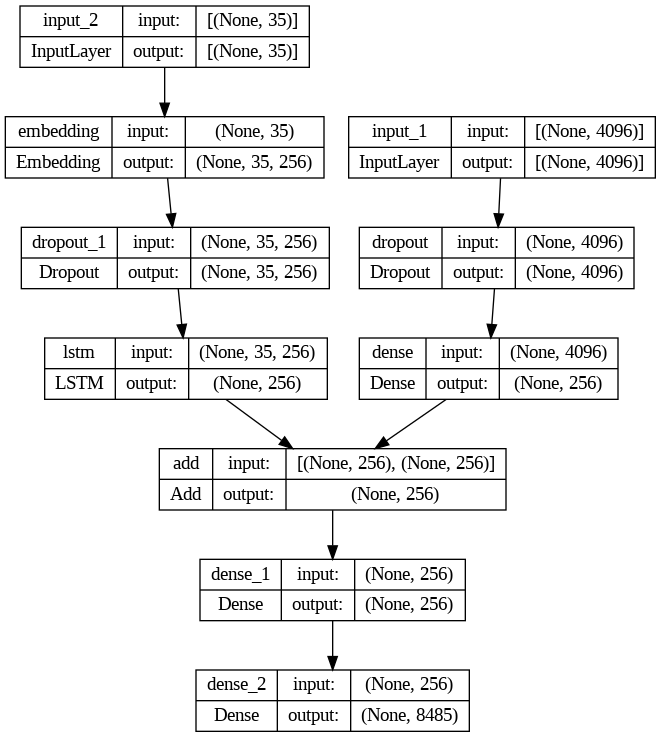

In [ ]:
# plot the model
plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# train the model
epochs = 30
batch_size = 32
steps = len(train) // batch_size

for i in range(epochs):
    # create data generator
    generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
    # fit for one epoch
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

227/227 [==============================] - 62s 271ms/step - loss: 1.9760 - accuracy: 0.4814


## Save the Model

In [ ]:
# save the model
model.save(WORKING_DIR+'/best_model_v1.h5')

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("best_model_v1.json", "w") as json_file:
    json_file.write(model_json)

## Import the Model

In [ ]:
%cd '/content/drive/MyDrive/Final Project AMIT'

/content/drive/MyDrive/Final Project AMIT


In [ ]:
from tensorflow.keras.models import model_from_json
# load json and create model
json_file = open('best_model_v1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [ ]:
# load weights into new model
loaded_model.load_weights("best_model_v1.h5")

# Transfer Learning

In this case we use the Transfer learning to train the model with more epochs, because google calab rams is limited.

## Version 1

### Define the model

In [ ]:
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# train the model
epochs = 30
batch_size = 32
steps = len(train) // batch_size

for i in range(epochs):
    # create data generator
    generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
    # fit for one epoch
    loaded_model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

227/227 [==============================] - 66s 290ms/step - loss: 1.6599 - accuracy: 0.5432


### Save the Model

In [ ]:
# save the model
loaded_model.save(WORKING_DIR+'/best_model_v2.h5')

In [ ]:
# serialize model to JSON
model_json = loaded_model.to_json()
with open("best_model_v2.json", "w") as json_file:
    json_file.write(model_json)

### Import the Model

In [ ]:
%cd '/content/drive/MyDrive/Final Project AMIT'

/content/drive/MyDrive/Final Project AMIT


In [ ]:
from tensorflow.keras.models import model_from_json
# load json and create model
json_file = open('best_model_v2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model_v2 = model_from_json(loaded_model_json)

In [ ]:
# load weights into new model
loaded_model_v2.load_weights("best_model_v2.h5")

## Version 2

### Define the model

In [ ]:
loaded_model_v2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# train the model
epochs = 30
batch_size = 32
steps = len(train) // batch_size

for i in range(epochs):
    # create data generator
    generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
    # fit for one epoch
    loaded_model_v2.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

227/227 [==============================] - 66s 292ms/step - loss: 1.5012 - accuracy: 0.5754


### Save the Model

In [ ]:
# save the model
loaded_model_v2.save(WORKING_DIR+'/best_model_v3.h5')

In [ ]:
# serialize model to JSON
model_json = loaded_model_v2.to_json()
with open("best_model_v3.json", "w") as json_file:
    json_file.write(model_json)

### Import the Model

In [ ]:
%cd '/content/drive/MyDrive/Final Project AMIT'

/content/drive/MyDrive/Final Project AMIT


In [ ]:
from tensorflow.keras.models import model_from_json
# load json and create model
json_file = open('best_model_v3.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model_v3 = model_from_json(loaded_model_json)

In [ ]:
# load weights into new model
loaded_model_v3.load_weights("best_model_v3.h5")

# Generate Prediction Captions for the Image

In [ ]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [ ]:
# generate caption for an image
def predict_caption(model, image, tokenizer, max_length):
    # add start tag for generation process
    in_text = 'startseq'
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length)
        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        # get index with high probability
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word
        # stop if we reach end tag
        if word == 'endseq':
            break
      
    return in_text

In [ ]:
from nltk.translate.bleu_score import corpus_bleu
# validate with test data
actual, predicted = list(), list()

for key in tqdm(test):
    # get actual caption
    captions = mapping[key]
    # predict the caption for image
    y_pred = predict_caption(loaded_model_v3, features[key], tokenizer, max_length) 
    # split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    actual.append(actual_captions)
    predicted.append(y_pred)

  0%|          | 0/810 [00:00<?, ?it/s]

In [ ]:
# calcuate BLEU score v3
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))

BLEU-1: 0.508943
BLEU-2: 0.280616


In [ ]:
# calcuate BLEU score v1
# print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
# print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))

BLEU-1: 0.524454
BLEU-2: 0.300492


# Visualize the Results

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def generate_caption(image_name):
    # load the image
    image_id = image_name.split('.')[0]
    img_path = os.path.join(BASE_DIR, "Images", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    # predict the caption
    y_pred = predict_caption(loaded_model_v3, features[image_id], tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

---------------------Actual---------------------
startseq black dog and spotted dog are fighting endseq
startseq black dog and tri-colored dog playing with each other on the road endseq
startseq black dog and white dog with brown spots are staring at each other in the street endseq
startseq two dogs of different breeds looking at each other on the road endseq
startseq two dogs on pavement moving toward each other endseq
--------------------Predicted--------------------
startseq two dogs are playing together on the beach endseq


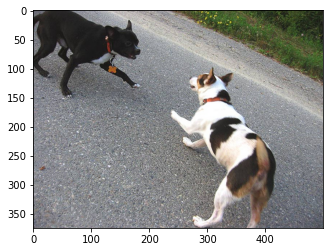

In [ ]:
generate_caption("1001773457_577c3a7d70.jpg")

---------------------Actual---------------------
startseq little girl covered in paint sits in front of painted rainbow with her hands in bowl endseq
startseq little girl is sitting in front of large painted rainbow endseq
startseq small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it endseq
startseq there is girl with pigtails sitting in front of rainbow painting endseq
startseq young girl with pigtails painting outside in the grass endseq
--------------------Predicted--------------------
startseq little girl in pink paint is painting of paint whilst painting climb on rainbow rainbow endseq


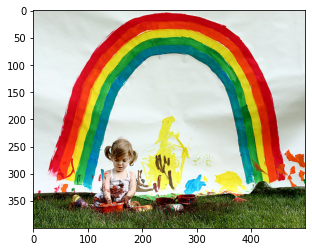

In [ ]:
generate_caption("1002674143_1b742ab4b8.jpg")

---------------------Actual---------------------
startseq man in hat is displaying pictures next to skier in blue hat endseq
startseq man skis past another man displaying paintings in the snow endseq
startseq person wearing skis looking at framed pictures set up in the snow endseq
startseq skier looks at framed pictures in the snow next to trees endseq
startseq man on skis looking at artwork for sale in the snow endseq
--------------------Predicted--------------------
startseq two people are displaying pictures in the snow endseq


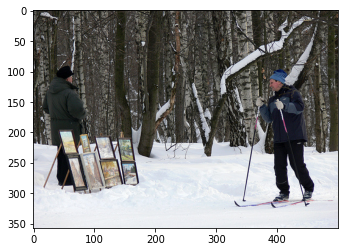

In [ ]:
generate_caption("101669240_b2d3e7f17b.jpg")

---------------------Actual---------------------
startseq child in pink dress is climbing up set of stairs in an entry way endseq
startseq girl going into wooden building endseq
startseq little girl climbing into wooden playhouse endseq
startseq little girl climbing the stairs to her playhouse endseq
startseq little girl in pink dress going into wooden cabin endseq
--------------------Predicted--------------------
startseq woman in pink dress is standing on the stairs endseq


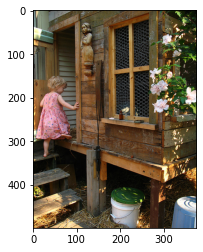

In [ ]:
generate_caption("1000268201_693b08cb0e.jpg")

# Test with Real Image

## ***Web Scraping***


From GettyImages website

### Libraries

In [ ]:
import requests
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import os

### Object

In [ ]:
# Git URL for the Website That the Images we need on it.
url = 'https://www.gettyimages.com/fotos/people-magazine?assettype=image&family=editorial&phrase=people%20magazine&sort=mostpopular'
url

'https://www.gettyimages.com/fotos/people-magazine?assettype=image&family=editorial&phrase=people%20magazine&sort=mostpopular'

In [ ]:
# Get the Headers
headers = requests.utils.default_headers()
headers.update({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'})

In [ ]:
r = requests.get(url,headers=headers)
r

<Response [200]>

In [ ]:
soup = BeautifulSoup(r.text,'html.parser')
soup

<!DOCTYPE html>
<html class="en-us no-js" lang="en-us" prefix="og: http://ogp.me/ns#"><head><link href="//spectrum.gettyimages.com" rel="preconnect"/><link href="//media.gettyimages.com" rel="preconnect"/><link href="//spectrum.gettyimages.com" rel="dns-prefetch"/><link href="//media.gettyimages.com" rel="dns-prefetch"/><link href="https://fonts.gstatic.com" rel="preconnect"><link href="https://fonts.googleapis.com/css?family=Lato:400,400i,700,700i&amp;subset=latin-ext" rel="stylesheet"><link href="/search/assets/css/getty-951fa221.css" media="all" rel="stylesheet" type="text/css"/><link href="/search/assets/css/application-a13736a3.css" media="all" rel="stylesheet" type="text/css"/><script defer="" src="/components/search-bar/static/remoteEntry.js"></script><script defer="defer" nomodule="nomodule" src="/search/assets/polyfill-cb10bb06cf17c5e8563e.js" type="text/javascript"></script><script defer="defer" src="/search/assets/application-9184794911c94177d38f.js" type="text/javascript"><

In [ ]:
# Git the images
images = soup.find_all('img')
images

[<img gi-icon="unisporkal/getty/close_large"/>,
 <img gi-icon="unisporkal/getty/arrow_previous"/>,
 <img gi-icon="unisporkal/getty/close_large"/>,
 <img class="recent-board__shared-icon" gi-icon="unisporkal/getty/shared_boards" ng-if="isSharedBoard(board)"/>,
 <img class="recent-board__confirmed-checkmark-icon" gi-icon="unisporkal/getty/confirmed_checkmark"/>,
 <img class="right-panel__arrow-icon" gi-icon="unisporkal/getty/arrow_right"/>,
 <img class="right-panel__arrow-icon" gi-icon="unisporkal/getty/arrow_right"/>,
 <img class="header__group-img" gi-icon="unisporkal/getty/hamburger" src="/search/assets/static/hamburger_menu-334731bd2db7cbd51fe6.svg"/>,
 <img src="/search/assets/static/unsplash_for_brands_engine-1c1d4e2bedeada021042.svg"/>,
 <img alt="Getty Images" class="header__logo-img" gi-icon="unisporkal/getty/logos/getty_images_no_trademark" src="/search/assets/static/getty_images_no_trademark-5e584aa9f38443a9fd11.svg"/>,
 <img class="header__group-img" gi-icon="unisporkal/getty

In [ ]:
# Look at the number of images
print(len(images))

130


In [ ]:
# Git the URL for each Image
for image in images:
  try:
    print(image['src'])
    print(image['alt'])
  except:
    continue

/search/assets/static/hamburger_menu-334731bd2db7cbd51fe6.svg
/search/assets/static/unsplash_for_brands_engine-1c1d4e2bedeada021042.svg
/search/assets/static/getty_images_no_trademark-5e584aa9f38443a9fd11.svg
Getty Images
/search/assets/static/boards_icon-6a98a96671a23a612487.svg
/search/assets/static/cart_icon-8bfe589cf69b8eef3a04.svg
https://media.gettyimages.com/id/91953482/photo/people-magazines-october-26-issue-with-recently-freed-kidnapping-victim-jaycee-dugard-on-the.jpg?s=612x612&w=0&k=20&c=46GmnskIjiOnNuCqgHdCXJ2eFUg8-h-3AzIJOA44hJY=
People Magazine's October 26 issue with recently freed kidnapping victim Jaycee Dugard on the cover, appears on a newstand in Washington on October...
https://media.gettyimages.com/id/97325353/photo/supermodel-heidi-klum-makes-an-appearance-at-a-people-magazine-party-to-plug-its12th-annual-50.jpg?s=612x612&w=0&k=20&c=qAf4tT3Q1vwvrDhMhfxj-PMSNWvybbt3KrZ17MsWX_U=
Supermodel Heidi Klum makes an appearance at a People magazine party to plug its12th an

In [ ]:
# Change the directory
%cd '/content/drive/MyDrive/Final Project AMIT/People Images'

/content/drive/MyDrive/Final Project AMIT/People Images


In [ ]:
i=0
for image in images:
  try:
    if 'jpg' in image['src']:
      with open(f'image_{i}.jpg','wb') as f:
        im = requests.get(image['src'])
        f.write(im.content)


      i+=1
      # break
  except:
    continue

**Download The Images**

In [ ]:
! pip install simple_image_download

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done


In [ ]:
from simple_image_download import simple_image_download as sid

In [ ]:
response = sid.simple_image_download
response

simple_image_download.simple_image_download.simple_image_download

In [ ]:
# Download the images
response().download('People', 10)

## Testing

### Image 1

In [ ]:
vgg_model = VGG16()
# restructure the model
vgg_model = Model(inputs=vgg_model.inputs, outputs=vgg_model.layers[-2].output)

In [ ]:
# Git the Path
image_path = '/content/drive/MyDrive/Final Project AMIT/People Images/image_0.jpg'

In [ ]:
# load image
image = load_img(image_path, target_size=(224, 224))

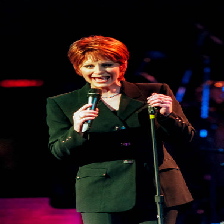

In [ ]:
image

In [ ]:
# convert image pixels to numpy array
image = img_to_array(image)
image

array([[[  0.,   0.,   2.],
        [  0.,   0.,   2.],
        [  1.,   1.,   3.],
        ...,
        [  1.,   1.,   1.],
        [  1.,   1.,   1.],
        [  1.,   1.,   1.]],

       [[  1.,   1.,   3.],
        [  1.,   1.,   3.],
        [  0.,   0.,   2.],
        ...,
        [  1.,   1.,   1.],
        [  1.,   1.,   1.],
        [  1.,   1.,   1.]],

       [[  2.,   2.,   4.],
        [  1.,   1.,   3.],
        [  0.,   0.,   2.],
        ...,
        [  1.,   1.,   1.],
        [  1.,   1.,   1.],
        [  1.,   1.,   1.]],

       ...,

       [[ 99.,   0.,  46.],
        [ 93.,   0.,  44.],
        [ 90.,   2.,  44.],
        ...,
        [  8.,  11.,  18.],
        [ 55.,  62.,  70.],
        [ 54.,  66.,  78.]],

       [[ 97.,   0.,  44.],
        [ 91.,   0.,  42.],
        [ 88.,   0.,  42.],
        ...,
        [ 95., 102., 112.],
        [117., 127., 129.],
        [143., 161., 163.]],

       [[ 86.,   0.,  34.],
        [ 87.,   0.,  37.],
        [ 88.,  

In [ ]:
# reshape data for model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image

array([[[[  0.,   0.,   2.],
         [  0.,   0.,   2.],
         [  1.,   1.,   3.],
         ...,
         [  1.,   1.,   1.],
         [  1.,   1.,   1.],
         [  1.,   1.,   1.]],

        [[  1.,   1.,   3.],
         [  1.,   1.,   3.],
         [  0.,   0.,   2.],
         ...,
         [  1.,   1.,   1.],
         [  1.,   1.,   1.],
         [  1.,   1.,   1.]],

        [[  2.,   2.,   4.],
         [  1.,   1.,   3.],
         [  0.,   0.,   2.],
         ...,
         [  1.,   1.,   1.],
         [  1.,   1.,   1.],
         [  1.,   1.,   1.]],

        ...,

        [[ 99.,   0.,  46.],
         [ 93.,   0.,  44.],
         [ 90.,   2.,  44.],
         ...,
         [  8.,  11.,  18.],
         [ 55.,  62.,  70.],
         [ 54.,  66.,  78.]],

        [[ 97.,   0.,  44.],
         [ 91.,   0.,  42.],
         [ 88.,   0.,  42.],
         ...,
         [ 95., 102., 112.],
         [117., 127., 129.],
         [143., 161., 163.]],

        [[ 86.,   0.,  34.],
       

In [ ]:
image.shape

(1, 224, 224, 3)

In [ ]:
# preprocess image for vgg
image = preprocess_input(image)
image

array([[[[-101.939    , -116.779    , -123.68     ],
         [-101.939    , -116.779    , -123.68     ],
         [-100.939    , -115.779    , -122.68     ],
         ...,
         [-102.939    , -115.779    , -122.68     ],
         [-102.939    , -115.779    , -122.68     ],
         [-102.939    , -115.779    , -122.68     ]],

        [[-100.939    , -115.779    , -122.68     ],
         [-100.939    , -115.779    , -122.68     ],
         [-101.939    , -116.779    , -123.68     ],
         ...,
         [-102.939    , -115.779    , -122.68     ],
         [-102.939    , -115.779    , -122.68     ],
         [-102.939    , -115.779    , -122.68     ]],

        [[ -99.939    , -114.779    , -121.68     ],
         [-100.939    , -115.779    , -122.68     ],
         [-101.939    , -116.779    , -123.68     ],
         ...,
         [-102.939    , -115.779    , -122.68     ],
         [-102.939    , -115.779    , -122.68     ],
         [-102.939    , -115.779    , -122.68     ]],

In [ ]:
# extract features
feature = vgg_model.predict(image, verbose=0)
feature

array([[1.6699686, 0.       , 0.       , ..., 0.       , 0.       ,
        1.042336 ]], dtype=float32)

In [ ]:
# predict from the trained model
predict_caption(loaded_model_v3, feature, tokenizer, max_length)

'startseq man in red shirt is playing guitar while man plays guitar behind him endseq'

### Image 2

In [ ]:
vgg_model = VGG16()
# restructure the model
vgg_model = Model(inputs=vgg_model.inputs, outputs=vgg_model.layers[-2].output)

In [ ]:
# Git the Path
image_path = '/content/drive/MyDrive/Final Project AMIT/People Images/image_1.jpg'

In [ ]:
# load image
image = load_img(image_path, target_size=(224, 224))

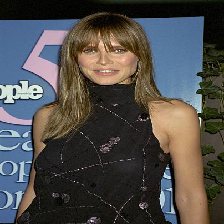

In [ ]:
image

In [ ]:
# convert image pixels to numpy array
image = img_to_array(image)
image

array([[[  4.,   5.,   0.],
        [  8.,   9.,   1.],
        [ 12.,  13.,   5.],
        ...,
        [ 15.,  23.,   8.],
        [ 20.,  28.,  13.],
        [ 16.,  24.,   9.]],

       [[ 16.,  17.,   9.],
        [ 15.,  16.,   8.],
        [ 10.,  11.,   3.],
        ...,
        [ 11.,  17.,   5.],
        [ 15.,  21.,   9.],
        [  9.,  15.,   3.]],

       [[  7.,   8.,   0.],
        [  3.,   4.,   0.],
        [  4.,   5.,   0.],
        ...,
        [  7.,  13.,   3.],
        [  5.,  11.,   1.],
        [ 11.,  17.,   7.]],

       ...,

       [[ 68.,  95., 142.],
        [ 72.,  99., 146.],
        [ 74., 101., 148.],
        ...,
        [ 45.,  39.,  27.],
        [ 43.,  37.,  25.],
        [ 41.,  35.,  23.]],

       [[ 83., 110., 157.],
        [ 79., 106., 153.],
        [ 76., 103., 150.],
        ...,
        [ 40.,  34.,  22.],
        [ 42.,  36.,  24.],
        [ 44.,  38.,  26.]],

       [[  7.,  13.,  13.],
        [  0.,   2.,   2.],
        [  3.,  

In [ ]:
# reshape data for model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image

array([[[[  4.,   5.,   0.],
         [  8.,   9.,   1.],
         [ 12.,  13.,   5.],
         ...,
         [ 15.,  23.,   8.],
         [ 20.,  28.,  13.],
         [ 16.,  24.,   9.]],

        [[ 16.,  17.,   9.],
         [ 15.,  16.,   8.],
         [ 10.,  11.,   3.],
         ...,
         [ 11.,  17.,   5.],
         [ 15.,  21.,   9.],
         [  9.,  15.,   3.]],

        [[  7.,   8.,   0.],
         [  3.,   4.,   0.],
         [  4.,   5.,   0.],
         ...,
         [  7.,  13.,   3.],
         [  5.,  11.,   1.],
         [ 11.,  17.,   7.]],

        ...,

        [[ 68.,  95., 142.],
         [ 72.,  99., 146.],
         [ 74., 101., 148.],
         ...,
         [ 45.,  39.,  27.],
         [ 43.,  37.,  25.],
         [ 41.,  35.,  23.]],

        [[ 83., 110., 157.],
         [ 79., 106., 153.],
         [ 76., 103., 150.],
         ...,
         [ 40.,  34.,  22.],
         [ 42.,  36.,  24.],
         [ 44.,  38.,  26.]],

        [[  7.,  13.,  13.],
       

In [ ]:
image.shape

(1, 224, 224, 3)

In [ ]:
# preprocess image for vgg
image = preprocess_input(image)
image

array([[[[-103.939    , -111.779    , -119.68     ],
         [-102.939    , -107.779    , -115.68     ],
         [ -98.939    , -103.779    , -111.68     ],
         ...,
         [ -95.939    ,  -93.779    , -108.68     ],
         [ -90.939    ,  -88.779    , -103.68     ],
         [ -94.939    ,  -92.779    , -107.68     ]],

        [[ -94.939    ,  -99.779    , -107.68     ],
         [ -95.939    , -100.779    , -108.68     ],
         [-100.939    , -105.779    , -113.68     ],
         ...,
         [ -98.939    ,  -99.779    , -112.68     ],
         [ -94.939    ,  -95.779    , -108.68     ],
         [-100.939    , -101.779    , -114.68     ]],

        [[-103.939    , -108.779    , -116.68     ],
         [-103.939    , -112.779    , -120.68     ],
         [-103.939    , -111.779    , -119.68     ],
         ...,
         [-100.939    , -103.779    , -116.68     ],
         [-102.939    , -105.779    , -118.68     ],
         [ -96.939    ,  -99.779    , -112.68     ]],

In [ ]:
# extract features
feature = vgg_model.predict(image, verbose=0)
feature

array([[0.        , 0.04078862, 0.        , ..., 0.        , 0.        ,
        1.94697   ]], dtype=float32)

In [ ]:
# predict from the trained model
predict_caption(loaded_model_v3, feature, tokenizer, max_length)

'startseq two women in black leather beer sign endseq'

### Image 3

In [ ]:
vgg_model = VGG16()
# restructure the model
vgg_model = Model(inputs=vgg_model.inputs, outputs=vgg_model.layers[-2].output)

In [ ]:
# Git the Path
image_path = '/content/drive/MyDrive/Final Project AMIT/People Images/image_2.jpg'

In [ ]:
# load image
image = load_img(image_path, target_size=(224, 224))

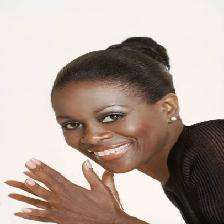

In [ ]:
image

In [ ]:
# convert image pixels to numpy array
image = img_to_array(image)
image

array([[[235., 234., 230.],
        [236., 235., 231.],
        [238., 237., 233.],
        ...,
        [239., 238., 234.],
        [239., 238., 234.],
        [239., 238., 234.]],

       [[237., 236., 232.],
        [237., 236., 232.],
        [238., 237., 233.],
        ...,
        [239., 238., 234.],
        [239., 238., 234.],
        [239., 238., 234.]],

       [[238., 237., 233.],
        [238., 237., 233.],
        [238., 237., 233.],
        ...,
        [239., 238., 234.],
        [239., 238., 234.],
        [239., 238., 234.]],

       ...,

       [[246., 241., 238.],
        [246., 241., 238.],
        [246., 241., 238.],
        ...,
        [ 23.,  18.,  12.],
        [ 26.,  21.,  17.],
        [ 36.,  30.,  30.]],

       [[246., 241., 238.],
        [246., 241., 238.],
        [246., 241., 238.],
        ...,
        [ 25.,  20.,  14.],
        [ 20.,  15.,  11.],
        [ 26.,  20.,  20.]],

       [[246., 241., 238.],
        [246., 241., 238.],
        [246., 2

In [ ]:
# reshape data for model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image

array([[[[235., 234., 230.],
         [236., 235., 231.],
         [238., 237., 233.],
         ...,
         [239., 238., 234.],
         [239., 238., 234.],
         [239., 238., 234.]],

        [[237., 236., 232.],
         [237., 236., 232.],
         [238., 237., 233.],
         ...,
         [239., 238., 234.],
         [239., 238., 234.],
         [239., 238., 234.]],

        [[238., 237., 233.],
         [238., 237., 233.],
         [238., 237., 233.],
         ...,
         [239., 238., 234.],
         [239., 238., 234.],
         [239., 238., 234.]],

        ...,

        [[246., 241., 238.],
         [246., 241., 238.],
         [246., 241., 238.],
         ...,
         [ 23.,  18.,  12.],
         [ 26.,  21.,  17.],
         [ 36.,  30.,  30.]],

        [[246., 241., 238.],
         [246., 241., 238.],
         [246., 241., 238.],
         ...,
         [ 25.,  20.,  14.],
         [ 20.,  15.,  11.],
         [ 26.,  20.,  20.]],

        [[246., 241., 238.],
       

In [ ]:
image.shape

(1, 224, 224, 3)

In [ ]:
# preprocess image for vgg
image = preprocess_input(image)
image

array([[[[ 126.061,  117.221,  111.32 ],
         [ 127.061,  118.221,  112.32 ],
         [ 129.061,  120.221,  114.32 ],
         ...,
         [ 130.061,  121.221,  115.32 ],
         [ 130.061,  121.221,  115.32 ],
         [ 130.061,  121.221,  115.32 ]],

        [[ 128.061,  119.221,  113.32 ],
         [ 128.061,  119.221,  113.32 ],
         [ 129.061,  120.221,  114.32 ],
         ...,
         [ 130.061,  121.221,  115.32 ],
         [ 130.061,  121.221,  115.32 ],
         [ 130.061,  121.221,  115.32 ]],

        [[ 129.061,  120.221,  114.32 ],
         [ 129.061,  120.221,  114.32 ],
         [ 129.061,  120.221,  114.32 ],
         ...,
         [ 130.061,  121.221,  115.32 ],
         [ 130.061,  121.221,  115.32 ],
         [ 130.061,  121.221,  115.32 ]],

        ...,

        [[ 134.061,  124.221,  122.32 ],
         [ 134.061,  124.221,  122.32 ],
         [ 134.061,  124.221,  122.32 ],
         ...,
         [ -91.939,  -98.779, -100.68 ],
         [ -86.939,  -

In [ ]:
# extract features
feature = vgg_model.predict(image, verbose=0)
feature

array([[0.        , 0.        , 0.29488623, ..., 0.        , 0.        ,
        0.02942419]], dtype=float32)

In [ ]:
# predict from the trained model
predict_caption(loaded_model_v3, feature, tokenizer, max_length)

'startseq young man wearing black shirt and black shirt is looking into the camera endseq'

### Image 4

In [ ]:
vgg_model = VGG16()
# restructure the model
vgg_model = Model(inputs=vgg_model.inputs, outputs=vgg_model.layers[-2].output)

In [ ]:
# Git the Path
image_path = '/content/drive/MyDrive/Final Project AMIT/People Images/image_3.jpg'

In [ ]:
# load image
image = load_img(image_path, target_size=(224, 224))

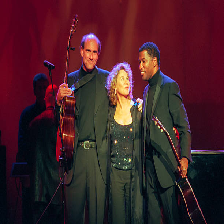

In [ ]:
image

In [ ]:
# convert image pixels to numpy array
image = img_to_array(image)
image

array([[[95.,  0., 30.],
        [95.,  0., 30.],
        [95.,  0., 30.],
        ...,
        [90.,  4., 29.],
        [90.,  4., 29.],
        [93.,  7., 32.]],

       [[95.,  0., 30.],
        [95.,  0., 30.],
        [95.,  0., 30.],
        ...,
        [90.,  4., 29.],
        [90.,  4., 29.],
        [90.,  4., 29.]],

       [[95.,  0., 30.],
        [95.,  0., 30.],
        [95.,  0., 30.],
        ...,
        [90.,  4., 29.],
        [90.,  4., 29.],
        [87.,  1., 26.]],

       ...,

       [[ 3., 12., 21.],
        [ 0.,  8., 17.],
        [ 0.,  9., 18.],
        ...,
        [ 3., 10., 18.],
        [ 3., 10., 18.],
        [ 3.,  5., 17.]],

       [[ 4., 13., 20.],
        [ 0.,  7., 23.],
        [ 2., 11., 18.],
        ...,
        [ 2.,  9., 17.],
        [ 2.,  9., 17.],
        [ 1., 10., 17.]],

       [[ 1., 10., 17.],
        [ 4., 11., 27.],
        [ 0.,  8., 15.],
        ...,
        [ 1.,  8., 16.],
        [ 5., 12., 20.],
        [ 4., 13., 18.]]

In [ ]:
# reshape data for model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image

array([[[[95.,  0., 30.],
         [95.,  0., 30.],
         [95.,  0., 30.],
         ...,
         [90.,  4., 29.],
         [90.,  4., 29.],
         [93.,  7., 32.]],

        [[95.,  0., 30.],
         [95.,  0., 30.],
         [95.,  0., 30.],
         ...,
         [90.,  4., 29.],
         [90.,  4., 29.],
         [90.,  4., 29.]],

        [[95.,  0., 30.],
         [95.,  0., 30.],
         [95.,  0., 30.],
         ...,
         [90.,  4., 29.],
         [90.,  4., 29.],
         [87.,  1., 26.]],

        ...,

        [[ 3., 12., 21.],
         [ 0.,  8., 17.],
         [ 0.,  9., 18.],
         ...,
         [ 3., 10., 18.],
         [ 3., 10., 18.],
         [ 3.,  5., 17.]],

        [[ 4., 13., 20.],
         [ 0.,  7., 23.],
         [ 2., 11., 18.],
         ...,
         [ 2.,  9., 17.],
         [ 2.,  9., 17.],
         [ 1., 10., 17.]],

        [[ 1., 10., 17.],
         [ 4., 11., 27.],
         [ 0.,  8., 15.],
         ...,
         [ 1.,  8., 16.],
        

In [ ]:
image.shape

(1, 224, 224, 3)

In [ ]:
# preprocess image for vgg
image = preprocess_input(image)
image

array([[[[ -73.939, -116.779,  -28.68 ],
         [ -73.939, -116.779,  -28.68 ],
         [ -73.939, -116.779,  -28.68 ],
         ...,
         [ -74.939, -112.779,  -33.68 ],
         [ -74.939, -112.779,  -33.68 ],
         [ -71.939, -109.779,  -30.68 ]],

        [[ -73.939, -116.779,  -28.68 ],
         [ -73.939, -116.779,  -28.68 ],
         [ -73.939, -116.779,  -28.68 ],
         ...,
         [ -74.939, -112.779,  -33.68 ],
         [ -74.939, -112.779,  -33.68 ],
         [ -74.939, -112.779,  -33.68 ]],

        [[ -73.939, -116.779,  -28.68 ],
         [ -73.939, -116.779,  -28.68 ],
         [ -73.939, -116.779,  -28.68 ],
         ...,
         [ -74.939, -112.779,  -33.68 ],
         [ -74.939, -112.779,  -33.68 ],
         [ -77.939, -115.779,  -36.68 ]],

        ...,

        [[ -82.939, -104.779, -120.68 ],
         [ -86.939, -108.779, -123.68 ],
         [ -85.939, -107.779, -123.68 ],
         ...,
         [ -85.939, -106.779, -120.68 ],
         [ -85.939, -1

In [ ]:
# extract features
feature = vgg_model.predict(image, verbose=0)
feature

array([[1.8799642 , 0.        , 0.        , ..., 0.        , 0.91385055,
        0.        ]], dtype=float32)

In [ ]:
# predict from the trained model
predict_caption(loaded_model_v3, feature, tokenizer, max_length)

'startseq man in white suit and sunglasses points to the left endseq'

### Image 5

In [ ]:
vgg_model = VGG16()
# restructure the model
vgg_model = Model(inputs=vgg_model.inputs, outputs=vgg_model.layers[-2].output)

In [ ]:
# Git the Path
image_path = '/content/drive/MyDrive/Final Project AMIT/AI Nasr 16 1 .jpg'

In [ ]:
# load image
image = load_img(image_path, target_size=(224, 224))

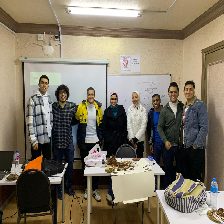

In [ ]:
image

In [ ]:
# convert image pixels to numpy array
image = img_to_array(image)
image

array([[[154., 132.,  91.],
        [156., 134.,  93.],
        [158., 136.,  95.],
        ...,
        [ 90.,  70.,  43.],
        [114.,  94.,  67.],
        [105.,  85.,  58.]],

       [[147., 125.,  84.],
        [153., 131.,  90.],
        [155., 133.,  92.],
        ...,
        [117.,  97.,  70.],
        [ 95.,  75.,  48.],
        [ 99.,  79.,  52.]],

       [[150., 128.,  87.],
        [154., 132.,  91.],
        [154., 132.,  91.],
        ...,
        [101.,  81.,  54.],
        [ 93.,  73.,  46.],
        [103.,  83.,  56.]],

       ...,

       [[  6.,   8.,   5.],
        [  6.,   5.,  10.],
        [ 99.,  78.,  33.],
        ...,
        [253., 238., 241.],
        [241., 226., 229.],
        [ 94.,  82.,  70.]],

       [[  6.,   7.,   9.],
        [  7.,  11.,  10.],
        [ 79.,  64.,  25.],
        ...,
        [218., 212., 196.],
        [200., 193., 187.],
        [255., 254., 244.]],

       [[  1.,   2.,   0.],
        [ 20.,  26.,  24.],
        [ 51.,  

In [ ]:
# reshape data for model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image

array([[[[154., 132.,  91.],
         [156., 134.,  93.],
         [158., 136.,  95.],
         ...,
         [ 90.,  70.,  43.],
         [114.,  94.,  67.],
         [105.,  85.,  58.]],

        [[147., 125.,  84.],
         [153., 131.,  90.],
         [155., 133.,  92.],
         ...,
         [117.,  97.,  70.],
         [ 95.,  75.,  48.],
         [ 99.,  79.,  52.]],

        [[150., 128.,  87.],
         [154., 132.,  91.],
         [154., 132.,  91.],
         ...,
         [101.,  81.,  54.],
         [ 93.,  73.,  46.],
         [103.,  83.,  56.]],

        ...,

        [[  6.,   8.,   5.],
         [  6.,   5.,  10.],
         [ 99.,  78.,  33.],
         ...,
         [253., 238., 241.],
         [241., 226., 229.],
         [ 94.,  82.,  70.]],

        [[  6.,   7.,   9.],
         [  7.,  11.,  10.],
         [ 79.,  64.,  25.],
         ...,
         [218., 212., 196.],
         [200., 193., 187.],
         [255., 254., 244.]],

        [[  1.,   2.,   0.],
       

In [ ]:
image.shape

(1, 224, 224, 3)

In [ ]:
# preprocess image for vgg
image = preprocess_input(image)
image

array([[[[ -12.939003 ,   15.221001 ,   30.32     ],
         [ -10.939003 ,   17.221    ,   32.32     ],
         [  -8.939003 ,   19.221    ,   34.32     ],
         ...,
         [ -60.939003 ,  -46.779    ,  -33.68     ],
         [ -36.939003 ,  -22.779    ,   -9.68     ],
         [ -45.939003 ,  -31.779    ,  -18.68     ]],

        [[ -19.939003 ,    8.221001 ,   23.32     ],
         [ -13.939003 ,   14.221001 ,   29.32     ],
         [ -11.939003 ,   16.221    ,   31.32     ],
         ...,
         [ -33.939003 ,  -19.779    ,   -6.6800003],
         [ -55.939003 ,  -41.779    ,  -28.68     ],
         [ -51.939003 ,  -37.779    ,  -24.68     ]],

        [[ -16.939003 ,   11.221001 ,   26.32     ],
         [ -12.939003 ,   15.221001 ,   30.32     ],
         [ -12.939003 ,   15.221001 ,   30.32     ],
         ...,
         [ -49.939003 ,  -35.779    ,  -22.68     ],
         [ -57.939003 ,  -43.779    ,  -30.68     ],
         [ -47.939003 ,  -33.779    ,  -20.68     ]],

In [ ]:
# extract features
feature = vgg_model.predict(image, verbose=0)
feature

array([[2.5826137, 1.3083352, 0.       , ..., 0.       , 0.       ,
        1.3317938]], dtype=float32)

In [ ]:
# predict from the trained model
predict_caption(loaded_model_v3, feature, tokenizer, max_length)

'startseq people are at round table in line with pet and girls endseq'

### Image 6

In [ ]:
vgg_model = VGG16()
# restructure the model
vgg_model = Model(inputs=vgg_model.inputs, outputs=vgg_model.layers[-2].output)

In [ ]:
# Git the Path
image_path = '/content/drive/MyDrive/Final Project AMIT/People Images/image_5.jpg'

In [ ]:
# load image
image = load_img(image_path, target_size=(224, 224))

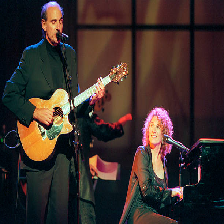

In [ ]:
image

In [ ]:
# convert image pixels to numpy array
image = img_to_array(image)
image

array([[[ 1., 11., 23.],
        [ 4., 14., 26.],
        [ 1., 11., 23.],
        ...,
        [28., 21., 29.],
        [28., 21., 29.],
        [33., 20., 27.]],

       [[ 0.,  9., 21.],
        [ 1., 11., 23.],
        [ 4., 14., 26.],
        ...,
        [31., 21., 30.],
        [31., 21., 30.],
        [33., 20., 27.]],

       [[ 0., 10., 22.],
        [ 5., 15., 27.],
        [ 0.,  7., 19.],
        ...,
        [33., 21., 31.],
        [33., 21., 31.],
        [34., 21., 28.]],

       ...,

       [[ 1., 11., 23.],
        [ 7., 17., 26.],
        [ 5., 16., 20.],
        ...,
        [ 2., 12., 21.],
        [ 0.,  8., 17.],
        [ 2., 10., 23.]],

       [[ 0., 10., 20.],
        [ 4., 10., 24.],
        [ 2., 12., 24.],
        ...,
        [ 0.,  8., 17.],
        [ 5., 15., 24.],
        [ 1., 10., 17.]],

       [[ 0., 13., 23.],
        [ 3.,  9., 23.],
        [ 0.,  9., 21.],
        ...,
        [ 0.,  8., 17.],
        [ 6., 16., 25.],
        [ 5., 16., 22.]]

In [ ]:
# reshape data for model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image

array([[[[ 1., 11., 23.],
         [ 4., 14., 26.],
         [ 1., 11., 23.],
         ...,
         [28., 21., 29.],
         [28., 21., 29.],
         [33., 20., 27.]],

        [[ 0.,  9., 21.],
         [ 1., 11., 23.],
         [ 4., 14., 26.],
         ...,
         [31., 21., 30.],
         [31., 21., 30.],
         [33., 20., 27.]],

        [[ 0., 10., 22.],
         [ 5., 15., 27.],
         [ 0.,  7., 19.],
         ...,
         [33., 21., 31.],
         [33., 21., 31.],
         [34., 21., 28.]],

        ...,

        [[ 1., 11., 23.],
         [ 7., 17., 26.],
         [ 5., 16., 20.],
         ...,
         [ 2., 12., 21.],
         [ 0.,  8., 17.],
         [ 2., 10., 23.]],

        [[ 0., 10., 20.],
         [ 4., 10., 24.],
         [ 2., 12., 24.],
         ...,
         [ 0.,  8., 17.],
         [ 5., 15., 24.],
         [ 1., 10., 17.]],

        [[ 0., 13., 23.],
         [ 3.,  9., 23.],
         [ 0.,  9., 21.],
         ...,
         [ 0.,  8., 17.],
        

In [ ]:
image.shape

(1, 224, 224, 3)

In [ ]:
# preprocess image for vgg
image = preprocess_input(image)
image

array([[[[ -80.939, -105.779, -122.68 ],
         [ -77.939, -102.779, -119.68 ],
         [ -80.939, -105.779, -122.68 ],
         ...,
         [ -74.939,  -95.779,  -95.68 ],
         [ -74.939,  -95.779,  -95.68 ],
         [ -76.939,  -96.779,  -90.68 ]],

        [[ -82.939, -107.779, -123.68 ],
         [ -80.939, -105.779, -122.68 ],
         [ -77.939, -102.779, -119.68 ],
         ...,
         [ -73.939,  -95.779,  -92.68 ],
         [ -73.939,  -95.779,  -92.68 ],
         [ -76.939,  -96.779,  -90.68 ]],

        [[ -81.939, -106.779, -123.68 ],
         [ -76.939, -101.779, -118.68 ],
         [ -84.939, -109.779, -123.68 ],
         ...,
         [ -72.939,  -95.779,  -90.68 ],
         [ -72.939,  -95.779,  -90.68 ],
         [ -75.939,  -95.779,  -89.68 ]],

        ...,

        [[ -80.939, -105.779, -122.68 ],
         [ -77.939,  -99.779, -116.68 ],
         [ -83.939, -100.779, -118.68 ],
         ...,
         [ -82.939, -104.779, -121.68 ],
         [ -86.939, -1

In [ ]:
# extract features
feature = vgg_model.predict(image, verbose=0)
feature

array([[4.509846, 0.      , 0.      , ..., 0.      , 0.      , 0.      ]],
      dtype=float32)

In [ ]:
# predict from the trained model
predict_caption(loaded_model_v3, feature, tokenizer, max_length)

'startseq the man played guitar and the the band is kicking guitar endseq'

### Image 7

In [ ]:
vgg_model = VGG16()
# restructure the model
vgg_model = Model(inputs=vgg_model.inputs, outputs=vgg_model.layers[-2].output)

In [ ]:
# Git the Path
image_path = '/content/drive/MyDrive/Final Project AMIT/People Images/image_6.jpg'

In [ ]:
# load image
image = load_img(image_path, target_size=(224, 224))

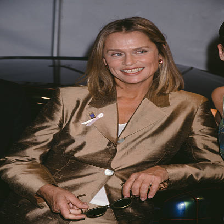

In [ ]:
image

In [ ]:
# convert image pixels to numpy array
image = img_to_array(image)
image

array([[[75., 77., 89.],
        [77., 79., 91.],
        [80., 82., 94.],
        ...,
        [82., 82., 90.],
        [82., 82., 90.],
        [82., 82., 90.]],

       [[80., 82., 94.],
        [81., 83., 95.],
        [82., 84., 96.],
        ...,
        [84., 84., 92.],
        [84., 84., 92.],
        [84., 84., 92.]],

       [[82., 84., 96.],
        [83., 85., 97.],
        [84., 86., 98.],
        ...,
        [84., 84., 92.],
        [84., 84., 92.],
        [84., 84., 92.]],

       ...,

       [[22., 25., 16.],
        [22., 25., 16.],
        [22., 25., 16.],
        ...,
        [17., 23., 13.],
        [16., 22., 12.],
        [16., 22., 12.]],

       [[22., 25., 16.],
        [22., 25., 16.],
        [22., 25., 16.],
        ...,
        [16., 22., 12.],
        [18., 24., 14.],
        [16., 22., 12.]],

       [[21., 24., 15.],
        [21., 24., 15.],
        [22., 25., 16.],
        ...,
        [18., 24., 14.],
        [18., 24., 14.],
        [18., 24., 14.]]

In [ ]:
# reshape data for model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image

array([[[[75., 77., 89.],
         [77., 79., 91.],
         [80., 82., 94.],
         ...,
         [82., 82., 90.],
         [82., 82., 90.],
         [82., 82., 90.]],

        [[80., 82., 94.],
         [81., 83., 95.],
         [82., 84., 96.],
         ...,
         [84., 84., 92.],
         [84., 84., 92.],
         [84., 84., 92.]],

        [[82., 84., 96.],
         [83., 85., 97.],
         [84., 86., 98.],
         ...,
         [84., 84., 92.],
         [84., 84., 92.],
         [84., 84., 92.]],

        ...,

        [[22., 25., 16.],
         [22., 25., 16.],
         [22., 25., 16.],
         ...,
         [17., 23., 13.],
         [16., 22., 12.],
         [16., 22., 12.]],

        [[22., 25., 16.],
         [22., 25., 16.],
         [22., 25., 16.],
         ...,
         [16., 22., 12.],
         [18., 24., 14.],
         [16., 22., 12.]],

        [[21., 24., 15.],
         [21., 24., 15.],
         [22., 25., 16.],
         ...,
         [18., 24., 14.],
        

In [ ]:
image.shape

(1, 224, 224, 3)

In [ ]:
# preprocess image for vgg
image = preprocess_input(image)
image

array([[[[ -14.939003,  -39.779   ,  -48.68    ],
         [ -12.939003,  -37.779   ,  -46.68    ],
         [  -9.939003,  -34.779   ,  -43.68    ],
         ...,
         [ -13.939003,  -34.779   ,  -41.68    ],
         [ -13.939003,  -34.779   ,  -41.68    ],
         [ -13.939003,  -34.779   ,  -41.68    ]],

        [[  -9.939003,  -34.779   ,  -43.68    ],
         [  -8.939003,  -33.779   ,  -42.68    ],
         [  -7.939003,  -32.779   ,  -41.68    ],
         ...,
         [ -11.939003,  -32.779   ,  -39.68    ],
         [ -11.939003,  -32.779   ,  -39.68    ],
         [ -11.939003,  -32.779   ,  -39.68    ]],

        [[  -7.939003,  -32.779   ,  -41.68    ],
         [  -6.939003,  -31.779   ,  -40.68    ],
         [  -5.939003,  -30.779   ,  -39.68    ],
         ...,
         [ -11.939003,  -32.779   ,  -39.68    ],
         [ -11.939003,  -32.779   ,  -39.68    ],
         [ -11.939003,  -32.779   ,  -39.68    ]],

        ...,

        [[ -87.939   ,  -91.779   , -1

In [ ]:
# extract features
feature = vgg_model.predict(image, verbose=0)
feature

array([[1.308422, 0.      , 0.      , ..., 0.      , 0.      , 4.075607]],
      dtype=float32)

In [ ]:
# predict from the trained model
predict_caption(loaded_model_v3, feature, tokenizer, max_length)

'startseq man points into the club while another man looks on endseq'

### Image 8

In [ ]:
vgg_model = VGG16()
# restructure the model
vgg_model = Model(inputs=vgg_model.inputs, outputs=vgg_model.layers[-2].output)

In [ ]:
# Git the Path
image_path = '/content/drive/MyDrive/Final Project AMIT/People Images/image_7.jpg'

In [ ]:
# load image
image = load_img(image_path, target_size=(224, 224))

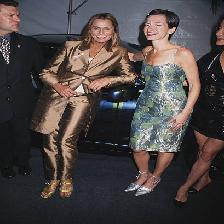

In [ ]:
image

In [ ]:
# convert image pixels to numpy array
image = img_to_array(image)
image

array([[[20., 20., 20.],
        [23., 23., 23.],
        [24., 24., 24.],
        ...,
        [23., 24., 29.],
        [10., 11., 16.],
        [ 0.,  0.,  2.]],

       [[28., 28., 28.],
        [23., 23., 23.],
        [19., 19., 19.],
        ...,
        [24., 25., 30.],
        [17., 18., 23.],
        [26., 27., 29.]],

       [[23., 23., 23.],
        [24., 24., 24.],
        [27., 27., 27.],
        ...,
        [35., 36., 41.],
        [21., 22., 27.],
        [27., 28., 30.]],

       ...,

       [[22., 23., 25.],
        [22., 23., 25.],
        [22., 23., 25.],
        ...,
        [18., 18., 18.],
        [18., 18., 18.],
        [18., 18., 18.]],

       [[22., 23., 25.],
        [22., 23., 25.],
        [22., 23., 25.],
        ...,
        [18., 18., 18.],
        [18., 18., 18.],
        [18., 18., 18.]],

       [[22., 23., 25.],
        [18., 19., 21.],
        [21., 22., 24.],
        ...,
        [18., 18., 18.],
        [18., 18., 18.],
        [18., 18., 18.]]

In [ ]:
# reshape data for model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image

array([[[[20., 20., 20.],
         [23., 23., 23.],
         [24., 24., 24.],
         ...,
         [23., 24., 29.],
         [10., 11., 16.],
         [ 0.,  0.,  2.]],

        [[28., 28., 28.],
         [23., 23., 23.],
         [19., 19., 19.],
         ...,
         [24., 25., 30.],
         [17., 18., 23.],
         [26., 27., 29.]],

        [[23., 23., 23.],
         [24., 24., 24.],
         [27., 27., 27.],
         ...,
         [35., 36., 41.],
         [21., 22., 27.],
         [27., 28., 30.]],

        ...,

        [[22., 23., 25.],
         [22., 23., 25.],
         [22., 23., 25.],
         ...,
         [18., 18., 18.],
         [18., 18., 18.],
         [18., 18., 18.]],

        [[22., 23., 25.],
         [22., 23., 25.],
         [22., 23., 25.],
         ...,
         [18., 18., 18.],
         [18., 18., 18.],
         [18., 18., 18.]],

        [[22., 23., 25.],
         [18., 19., 21.],
         [21., 22., 24.],
         ...,
         [18., 18., 18.],
        

In [ ]:
image.shape

(1, 224, 224, 3)

In [ ]:
# preprocess image for vgg
image = preprocess_input(image)
image

array([[[[ -83.939   ,  -96.779   , -103.68    ],
         [ -80.939   ,  -93.779   , -100.68    ],
         [ -79.939   ,  -92.779   ,  -99.68    ],
         ...,
         [ -74.939   ,  -92.779   , -100.68    ],
         [ -87.939   , -105.779   , -113.68    ],
         [-101.939   , -116.779   , -123.68    ]],

        [[ -75.939   ,  -88.779   ,  -95.68    ],
         [ -80.939   ,  -93.779   , -100.68    ],
         [ -84.939   ,  -97.779   , -104.68    ],
         ...,
         [ -73.939   ,  -91.779   ,  -99.68    ],
         [ -80.939   ,  -98.779   , -106.68    ],
         [ -74.939   ,  -89.779   ,  -97.68    ]],

        [[ -80.939   ,  -93.779   , -100.68    ],
         [ -79.939   ,  -92.779   ,  -99.68    ],
         [ -76.939   ,  -89.779   ,  -96.68    ],
         ...,
         [ -62.939003,  -80.779   ,  -88.68    ],
         [ -76.939   ,  -94.779   , -102.68    ],
         [ -73.939   ,  -88.779   ,  -96.68    ]],

        ...,

        [[ -78.939   ,  -93.779   , -1

In [ ]:
# extract features
feature = vgg_model.predict(image, verbose=0)
feature

array([[0.        , 0.14810681, 0.        , ..., 0.        , 0.        ,
        0.24689752]], dtype=float32)

In [ ]:
# predict from the trained model
predict_caption(loaded_model_v3, feature, tokenizer, max_length)

'startseq two women in black dresses endseq'

### Image 9

In [ ]:
vgg_model = VGG16()
# restructure the model
vgg_model = Model(inputs=vgg_model.inputs, outputs=vgg_model.layers[-2].output)

In [ ]:
# Git the Path
image_path = '/content/drive/MyDrive/Final Project AMIT/People Images/image_8.jpg'

In [ ]:
# load image
image = load_img(image_path, target_size=(224, 224))

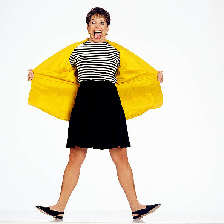

In [ ]:
image

In [ ]:
# convert image pixels to numpy array
image = img_to_array(image)
image

array([[[240., 241., 243.],
        [240., 241., 243.],
        [240., 241., 243.],
        ...,
        [241., 241., 241.],
        [241., 241., 241.],
        [241., 241., 239.]],

       [[240., 241., 243.],
        [240., 241., 243.],
        [240., 241., 243.],
        ...,
        [241., 241., 241.],
        [241., 241., 241.],
        [241., 241., 239.]],

       [[240., 241., 243.],
        [240., 241., 243.],
        [240., 241., 243.],
        ...,
        [241., 241., 241.],
        [241., 241., 241.],
        [241., 241., 239.]],

       ...,

       [[229., 228., 226.],
        [229., 228., 226.],
        [229., 228., 226.],
        ...,
        [245., 246., 248.],
        [245., 246., 248.],
        [244., 245., 247.]],

       [[240., 236., 233.],
        [240., 236., 233.],
        [240., 236., 233.],
        ...,
        [246., 247., 249.],
        [246., 247., 249.],
        [244., 245., 247.]],

       [[236., 236., 234.],
        [237., 237., 235.],
        [238., 2

In [ ]:
# reshape data for model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image

array([[[[240., 241., 243.],
         [240., 241., 243.],
         [240., 241., 243.],
         ...,
         [241., 241., 241.],
         [241., 241., 241.],
         [241., 241., 239.]],

        [[240., 241., 243.],
         [240., 241., 243.],
         [240., 241., 243.],
         ...,
         [241., 241., 241.],
         [241., 241., 241.],
         [241., 241., 239.]],

        [[240., 241., 243.],
         [240., 241., 243.],
         [240., 241., 243.],
         ...,
         [241., 241., 241.],
         [241., 241., 241.],
         [241., 241., 239.]],

        ...,

        [[229., 228., 226.],
         [229., 228., 226.],
         [229., 228., 226.],
         ...,
         [245., 246., 248.],
         [245., 246., 248.],
         [244., 245., 247.]],

        [[240., 236., 233.],
         [240., 236., 233.],
         [240., 236., 233.],
         ...,
         [246., 247., 249.],
         [246., 247., 249.],
         [244., 245., 247.]],

        [[236., 236., 234.],
       

In [ ]:
image.shape

(1, 224, 224, 3)

In [ ]:
# preprocess image for vgg
image = preprocess_input(image)
image

array([[[[139.061  , 124.221  , 116.32   ],
         [139.061  , 124.221  , 116.32   ],
         [139.061  , 124.221  , 116.32   ],
         ...,
         [137.061  , 124.221  , 117.32   ],
         [137.061  , 124.221  , 117.32   ],
         [135.061  , 124.221  , 117.32   ]],

        [[139.061  , 124.221  , 116.32   ],
         [139.061  , 124.221  , 116.32   ],
         [139.061  , 124.221  , 116.32   ],
         ...,
         [137.061  , 124.221  , 117.32   ],
         [137.061  , 124.221  , 117.32   ],
         [135.061  , 124.221  , 117.32   ]],

        [[139.061  , 124.221  , 116.32   ],
         [139.061  , 124.221  , 116.32   ],
         [139.061  , 124.221  , 116.32   ],
         ...,
         [137.061  , 124.221  , 117.32   ],
         [137.061  , 124.221  , 117.32   ],
         [135.061  , 124.221  , 117.32   ]],

        ...,

        [[122.061  , 111.221  , 105.32   ],
         [122.061  , 111.221  , 105.32   ],
         [122.061  , 111.221  , 105.32   ],
         ...,


In [ ]:
# extract features
feature = vgg_model.predict(image, verbose=0)
feature

array([[0.       , 0.       , 0.       , ..., 0.       , 0.6418048,
        0.       ]], dtype=float32)

In [ ]:
# predict from the trained model
predict_caption(loaded_model_v3, feature, tokenizer, max_length)

'startseq woman in red and white is throwing the rainbow endseq'

### Image 10

In [ ]:
vgg_model = VGG16()
# restructure the model
vgg_model = Model(inputs=vgg_model.inputs, outputs=vgg_model.layers[-2].output)

In [ ]:
# Git the Path
image_path = '/content/drive/MyDrive/Final Project AMIT/People Images/image_9.jpg'

In [ ]:
# load image
image = load_img(image_path, target_size=(224, 224))

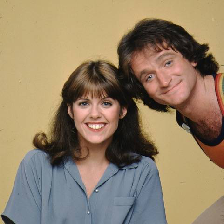

In [ ]:
image

In [ ]:
# convert image pixels to numpy array
image = img_to_array(image)
image

array([[[188., 168., 115.],
        [188., 168., 115.],
        [188., 168., 115.],
        ...,
        [185., 163., 113.],
        [186., 164., 114.],
        [186., 164., 114.]],

       [[189., 169., 116.],
        [189., 169., 116.],
        [189., 169., 116.],
        ...,
        [186., 164., 114.],
        [184., 162., 112.],
        [183., 161., 111.]],

       [[190., 170., 117.],
        [190., 170., 117.],
        [190., 170., 117.],
        ...,
        [185., 163., 113.],
        [185., 163., 113.],
        [185., 163., 113.]],

       ...,

       [[193., 171., 111.],
        [181., 161., 110.],
        [193., 179., 144.],
        ...,
        [148., 129., 112.],
        [143., 124., 107.],
        [136., 117., 100.]],

       [[186., 166., 103.],
        [192., 173., 117.],
        [173., 158., 115.],
        ...,
        [145., 126., 109.],
        [144., 125., 108.],
        [149., 130., 113.]],

       [[192., 172., 109.],
        [184., 165., 106.],
        [196., 1

In [ ]:
# reshape data for model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image

array([[[[188., 168., 115.],
         [188., 168., 115.],
         [188., 168., 115.],
         ...,
         [185., 163., 113.],
         [186., 164., 114.],
         [186., 164., 114.]],

        [[189., 169., 116.],
         [189., 169., 116.],
         [189., 169., 116.],
         ...,
         [186., 164., 114.],
         [184., 162., 112.],
         [183., 161., 111.]],

        [[190., 170., 117.],
         [190., 170., 117.],
         [190., 170., 117.],
         ...,
         [185., 163., 113.],
         [185., 163., 113.],
         [185., 163., 113.]],

        ...,

        [[193., 171., 111.],
         [181., 161., 110.],
         [193., 179., 144.],
         ...,
         [148., 129., 112.],
         [143., 124., 107.],
         [136., 117., 100.]],

        [[186., 166., 103.],
         [192., 173., 117.],
         [173., 158., 115.],
         ...,
         [145., 126., 109.],
         [144., 125., 108.],
         [149., 130., 113.]],

        [[192., 172., 109.],
       

In [ ]:
image.shape

(1, 224, 224, 3)

In [ ]:
# preprocess image for vgg
image = preprocess_input(image)
image

array([[[[11.060997  , 51.221     , 64.32      ],
         [11.060997  , 51.221     , 64.32      ],
         [11.060997  , 51.221     , 64.32      ],
         ...,
         [ 9.060997  , 46.221     , 61.32      ],
         [10.060997  , 47.221     , 62.32      ],
         [10.060997  , 47.221     , 62.32      ]],

        [[12.060997  , 52.221     , 65.32      ],
         [12.060997  , 52.221     , 65.32      ],
         [12.060997  , 52.221     , 65.32      ],
         ...,
         [10.060997  , 47.221     , 62.32      ],
         [ 8.060997  , 45.221     , 60.32      ],
         [ 7.060997  , 44.221     , 59.32      ]],

        [[13.060997  , 53.221     , 66.32      ],
         [13.060997  , 53.221     , 66.32      ],
         [13.060997  , 53.221     , 66.32      ],
         ...,
         [ 9.060997  , 46.221     , 61.32      ],
         [ 9.060997  , 46.221     , 61.32      ],
         [ 9.060997  , 46.221     , 61.32      ]],

        ...,

        [[ 7.060997  , 54.221     , 69

In [ ]:
# extract features
feature = vgg_model.predict(image, verbose=0)
feature

array([[0.3535491, 0.       , 0.       , ..., 0.       , 0.       ,
        2.3629267]], dtype=float32)

In [ ]:
# predict from the trained model
predict_caption(loaded_model_v3, feature, tokenizer, max_length)

'startseq the woman is wearing black and smiling endseq'

### Another Image

In [ ]:
vgg_model = VGG16()
# restructure the model
vgg_model = Model(inputs=vgg_model.inputs, outputs=vgg_model.layers[-2].output)

In [ ]:
# Git the Path
image_path = '/content/drive/MyDrive/Final Project AMIT/images.jpg'

In [ ]:
# load image
image = load_img(image_path, target_size=(224, 224))

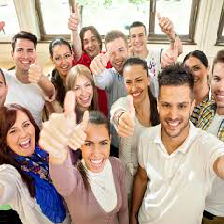

In [ ]:
image

In [ ]:
# convert image pixels to numpy array
image = img_to_array(image)
image

array([[[250., 248., 235.],
        [250., 248., 235.],
        [249., 247., 234.],
        ...,
        [216., 209., 180.],
        [223., 217., 185.],
        [185., 179., 147.]],

       [[255., 253., 241.],
        [254., 252., 240.],
        [252., 250., 238.],
        ...,
        [219., 212., 183.],
        [228., 222., 190.],
        [169., 163., 131.]],

       [[247., 244., 235.],
        [249., 246., 237.],
        [250., 247., 238.],
        ...,
        [222., 215., 186.],
        [232., 226., 194.],
        [146., 140., 108.]],

       ...,

       [[ 16.,  28.,  16.],
        [ 16.,  28.,  16.],
        [ 18.,  26.,  15.],
        ...,
        [ 89.,  56.,  15.],
        [ 89.,  56.,  15.],
        [ 89.,  56.,  15.]],

       [[  2.,   2.,   2.],
        [  2.,   2.,   2.],
        [  2.,   2.,   2.],
        ...,
        [ 74.,  51.,  10.],
        [ 82.,  59.,  18.],
        [ 84.,  61.,  20.]],

       [[  2.,   2.,   2.],
        [  2.,   2.,   2.],
        [  2.,  

In [ ]:
# reshape data for model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image

array([[[[250., 248., 235.],
         [250., 248., 235.],
         [249., 247., 234.],
         ...,
         [216., 209., 180.],
         [223., 217., 185.],
         [185., 179., 147.]],

        [[255., 253., 241.],
         [254., 252., 240.],
         [252., 250., 238.],
         ...,
         [219., 212., 183.],
         [228., 222., 190.],
         [169., 163., 131.]],

        [[247., 244., 235.],
         [249., 246., 237.],
         [250., 247., 238.],
         ...,
         [222., 215., 186.],
         [232., 226., 194.],
         [146., 140., 108.]],

        ...,

        [[ 16.,  28.,  16.],
         [ 16.,  28.,  16.],
         [ 18.,  26.,  15.],
         ...,
         [ 89.,  56.,  15.],
         [ 89.,  56.,  15.],
         [ 89.,  56.,  15.]],

        [[  2.,   2.,   2.],
         [  2.,   2.,   2.],
         [  2.,   2.,   2.],
         ...,
         [ 74.,  51.,  10.],
         [ 82.,  59.,  18.],
         [ 84.,  61.,  20.]],

        [[  2.,   2.,   2.],
       

In [ ]:
image.shape

(1, 224, 224, 3)

In [ ]:
# preprocess image for vgg
image = preprocess_input(image)
image

array([[[[ 131.061   ,  131.22101 ,  126.32    ],
         [ 131.061   ,  131.22101 ,  126.32    ],
         [ 130.061   ,  130.22101 ,  125.32    ],
         ...,
         [  76.061   ,   92.221   ,   92.32    ],
         [  81.061   ,  100.221   ,   99.32    ],
         [  43.060997,   62.221   ,   61.32    ]],

        [[ 137.061   ,  136.22101 ,  131.32    ],
         [ 136.061   ,  135.22101 ,  130.32    ],
         [ 134.061   ,  133.22101 ,  128.32    ],
         ...,
         [  79.061   ,   95.221   ,   95.32    ],
         [  86.061   ,  105.221   ,  104.32    ],
         [  27.060997,   46.221   ,   45.32    ]],

        [[ 131.061   ,  127.221   ,  123.32    ],
         [ 133.061   ,  129.22101 ,  125.32    ],
         [ 134.061   ,  130.22101 ,  126.32    ],
         ...,
         [  82.061   ,   98.221   ,   98.32    ],
         [  90.061   ,  109.221   ,  108.32    ],
         [   4.060997,   23.221   ,   22.32    ]],

        ...,

        [[ -87.939   ,  -88.779   , -1

In [ ]:
# extract features
feature = vgg_model.predict(image, verbose=0)
feature

array([[0.        , 0.3334885 , 0.        , ..., 0.        , 0.        ,
        0.01769841]], dtype=float32)

In [ ]:
# predict from the trained model
predict_caption(loaded_model_v3, feature, tokenizer, max_length)

'startseq group of children are sitting closely on folding chairs with their arms around endseq'